# Compute transmission for each disperser

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import os
from astropy.io import fits
import numpy as np
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages 
from matplotlib.colors import LogNorm
import glob
import re

In [4]:
from astropy.io import fits

In [12]:
#Photometric nights
#ana_dir=['../ana_30may17','../ana_08jun17','../ana_09jun17','../ana_10jun17','../ana_12jun17']
# add the 6 jun 17, not a perfect night according Merra2, but not too bad
ana_dir=['../ana_30may17','../ana_06jun17','../ana_08jun17','../ana_09jun17','../ana_10jun17','../ana_12jun17']

In [6]:
all_files_dir=[]
for the_dir in ana_dir:
    all_files = glob.glob(os.path.join(the_dir,'*.fits'))
    all_files_dir.append(all_files)  

In [7]:
all_files_dir

[['../ana_30may17/ratio_Thor300.fits',
  '../ana_30may17/ratio_HoloPhAg.fits',
  '../ana_30may17/ratio_HoloAmAg.fits',
  '../ana_30may17/output.fits',
  '../ana_30may17/ratio_Ron400.fits',
  '../ana_30may17/ratio_HoloPhP.fits'],
 ['../ana_06jun17/ratio_Thor300.fits',
  '../ana_06jun17/ratio_HoloPhAg.fits',
  '../ana_06jun17/ratio_HoloAmAg.fits',
  '../ana_06jun17/ratio_Ron200.fits',
  '../ana_06jun17/ratio_HoloPhP.fits'],
 ['../ana_08jun17/ratio_Thor300.fits',
  '../ana_08jun17/ratio_HoloPhAg.fits',
  '../ana_08jun17/ratio_HoloAmAg.fits',
  '../ana_08jun17/ratio_Ron200.fits',
  '../ana_08jun17/ratio_HoloPhP.fits'],
 ['../ana_09jun17/ratio_Thor300.fits',
  '../ana_09jun17/ratio_HoloPhAg.fits',
  '../ana_09jun17/ratio_HoloAmAg.fits',
  '../ana_09jun17/ratio_Ron200.fits',
  '../ana_09jun17/ratio_Ron400.fits',
  '../ana_09jun17/ratio_HoloPhP.fits'],
 ['../ana_10jun17/ratio_Thor300.fits',
  '../ana_10jun17/ratio_HoloPhAg.fits',
  '../ana_10jun17/ratio_HoloAmAg.fits',
  '../ana_10jun17/ratio

In [8]:
dispersers=['Ron200','Ron400','Thor300','HoloPhP','HoloPhAg','HoloAmAg']

# Reorder the files per disperser

In [9]:
disp_dir=[]
for disp in dispersers:
    disp_files=[]
    searchtag='.'+disp+'.fits$'   
    for dir in all_files_dir:
        for file in dir:
            if re.search(searchtag,file):
                disp_files.append(file)
    disp_dir.append(disp_files)

In [10]:
disp_dir

[['../ana_06jun17/ratio_Ron200.fits',
  '../ana_08jun17/ratio_Ron200.fits',
  '../ana_09jun17/ratio_Ron200.fits'],
 ['../ana_30may17/ratio_Ron400.fits', '../ana_09jun17/ratio_Ron400.fits'],
 ['../ana_30may17/ratio_Thor300.fits',
  '../ana_06jun17/ratio_Thor300.fits',
  '../ana_08jun17/ratio_Thor300.fits',
  '../ana_09jun17/ratio_Thor300.fits',
  '../ana_10jun17/ratio_Thor300.fits',
  '../ana_12jun17/ratio_Thor300.fits'],
 ['../ana_30may17/ratio_HoloPhP.fits',
  '../ana_06jun17/ratio_HoloPhP.fits',
  '../ana_08jun17/ratio_HoloPhP.fits',
  '../ana_09jun17/ratio_HoloPhP.fits',
  '../ana_10jun17/ratio_HoloPhP.fits',
  '../ana_12jun17/ratio_HoloPhP.fits'],
 ['../ana_30may17/ratio_HoloPhAg.fits',
  '../ana_06jun17/ratio_HoloPhAg.fits',
  '../ana_08jun17/ratio_HoloPhAg.fits',
  '../ana_09jun17/ratio_HoloPhAg.fits',
  '../ana_10jun17/ratio_HoloPhAg.fits',
  '../ana_12jun17/ratio_HoloPhAg.fits'],
 ['../ana_30may17/ratio_HoloAmAg.fits',
  '../ana_06jun17/ratio_HoloAmAg.fits',
  '../ana_08jun17/r

/Users/dagoret/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()
/Users/dagoret/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log10
  # This is added back by InteractiveShellApp.init_path()


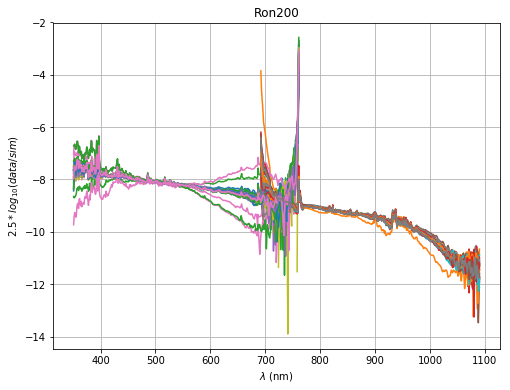

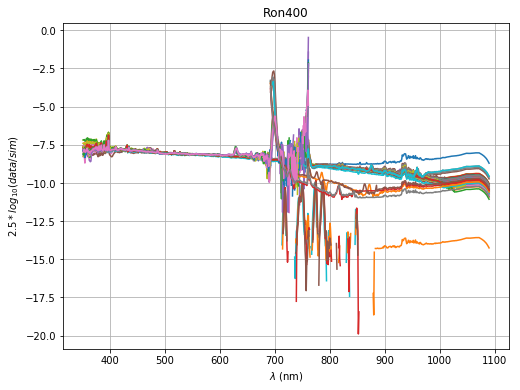

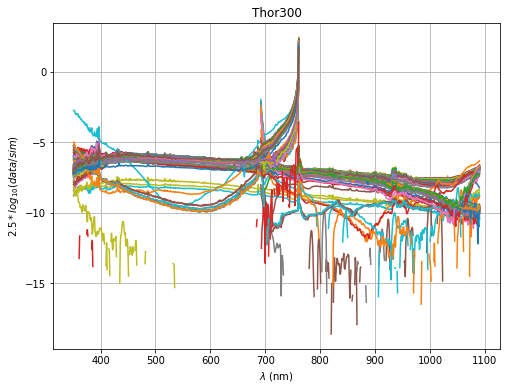

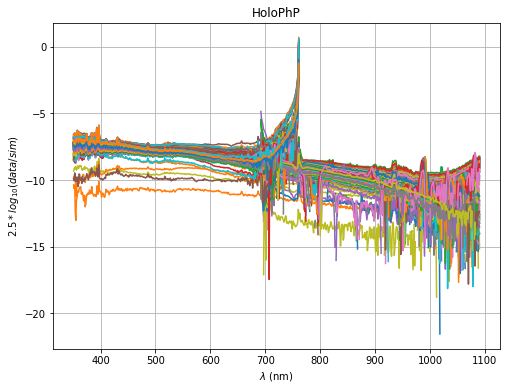

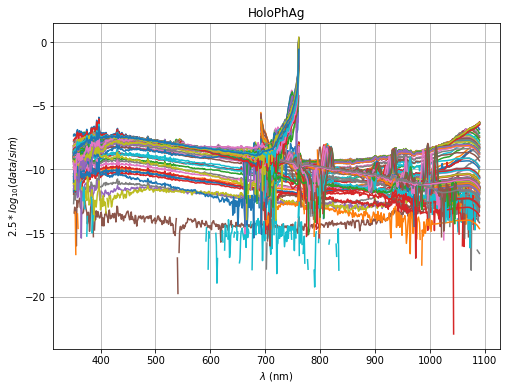

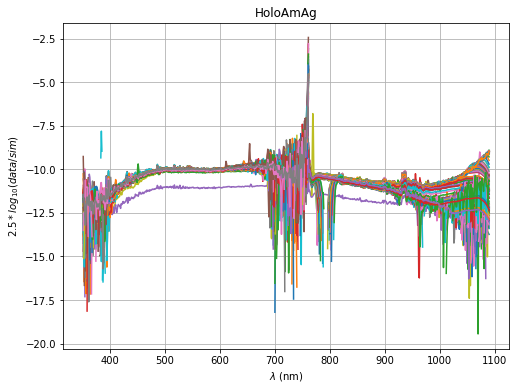

In [11]:
index_d=0
for dispd in disp_dir:
    plt.figure(figsize=(8,6))
    for file in dispd:
        hdu=fits.open(file)
        data=hdu[0].data
        N_curv=data.shape[0]-1
        wl=data[0,:]
        for idx in np.arange(N_curv):
            r=data[1+idx,:]
            plt.plot(wl,2.5*np.log10(r))
    
    plt.title(dispersers[index_d])
    plt.grid()    
    
    plt.xlabel("$\lambda$ (nm)")
    plt.ylabel("$2.5*log_{10} (data/sim)$")
    plt.show()
    index_d+=1

# Clean with medians